# Exploratory Data Analysis

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import datetime
import seaborn as sns
import statsmodels.api as sm # import statsmodels 
import random

%matplotlib inline
os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/Projects')
# os.chdir('/aaron's filepath)

### Read in csv file and inspect variables
This .csv file was created using data_cleaning.py and IPUMS resources stored in the data folder.

In [51]:
df = pd.read_csv('ipums_1.csv')

In [52]:
df.head()

,MIGRATE1,VETSTAT,UHRSWORK,OCC,EMPSTAT,YRMARR,ANCESTR1,CLASSWKR,EDUC,INCTOT,...,MARST,NCHLT5,VALUEH,HHINCOME,MORTAMT1,YEAR,AGEMARR,PCT_HHINC,PCT_MTG_INC,OCC_BROAD
0,1,1,0,0,3,1992,north american,0,2,15000,...,5,0,9999999,9999999,0,2018,40,0.150,0.0,other
1,1,1,0,0,3,1993,north american,0,2,12000,...,2,0,9999999,9999999,0,2018,40,0.120,0.0,other
2,1,1,0,0,3,1986,north american,0,1,9900,...,5,0,9999999,9999999,0,2018,47,0.099,0.0,other
3,2,2,0,0,3,1988,hispanic,0,2,1400,...,3,0,9999999,9999999,0,2018,27,0.014,0.0,other
4,1,1,0,0,3,1985,north american,0,1,12000,...,5,0,9999999,9999999,0,2018,48,0.120,0.0,other


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MIGRATE1,1880856.0,1.126305e+00,4.144306e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
VETSTAT,1880856.0,1.098338e+00,2.977715e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
UHRSWORK,1880856.0,2.422340e+01,2.173271e+01,0.000000e+00,0.000000e+00,3.100000e+01,4.000000e+01,9.900000e+01
OCC,1880856.0,2.870267e+03,2.934361e+03,0.000000e+00,0.000000e+00,2.310000e+03,4.850000e+03,9.920000e+03
EMPSTAT,1880856.0,1.850876e+00,9.799293e-01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00
YRMARR,1880856.0,1.991496e+03,1.758481e+01,1.937000e+03,1.979000e+03,1.993000e+03,2.006000e+03,2.018000e+03
CLASSWKR,1880856.0,1.315973e+00,9.003255e-01,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
EDUC,1880856.0,1.649339e+00,7.690776e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
INCTOT,1880856.0,5.088840e+04,7.121308e+04,-1.000000e+04,1.320000e+04,3.200000e+04,6.200000e+04,1.423000e+06
RACE,1880856.0,1.441771e+00,1.072447e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880856 entries, 0 to 1880855
Data columns (total 33 columns):
MIGRATE1       int64
VETSTAT        int64
UHRSWORK       int64
OCC            int64
EMPSTAT        int64
YRMARR         int64
ANCESTR1       object
CLASSWKR       int64
EDUC           int64
INCTOT         int64
RACE           int64
HISPAN         int64
DEGFIELD       int64
AGE            int64
BIRTHYR        int64
MORTGAGE       int64
SEX            int64
PERWT          float64
STRATA         int64
CLUSTER        int64
MARRNO         int64
NCHILD         int64
STATEFIP       int64
MARST          int64
NCHLT5         int64
VALUEH         int64
HHINCOME       int64
MORTAMT1       int64
YEAR           int64
AGEMARR        int64
PCT_HHINC      float64
PCT_MTG_INC    float64
OCC_BROAD      object
dtypes: float64(3), int64(28), object(2)
memory usage: 473.5+ MB


In [55]:
married_df = df.loc[df['MARST'] == 1]
divorced_df = df.loc[df['MARST'] == 4]

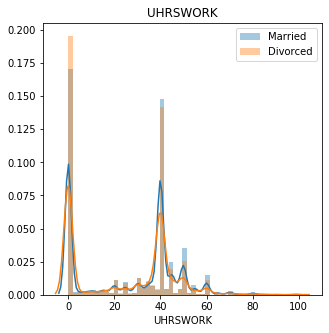

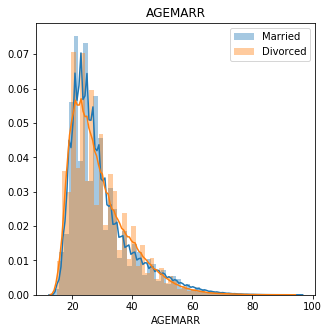

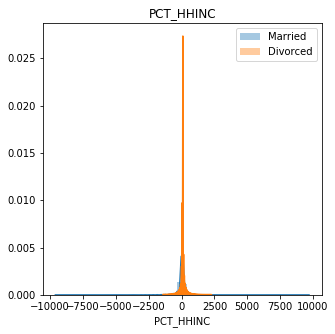

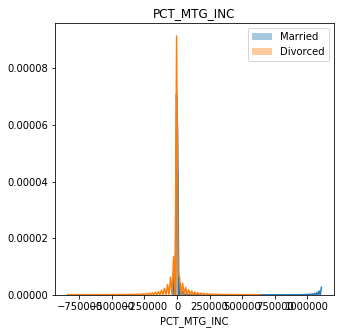

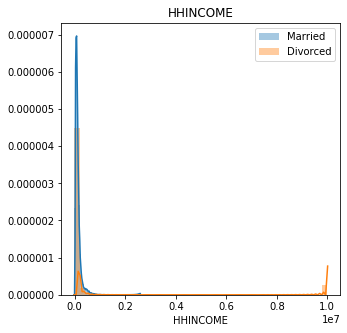

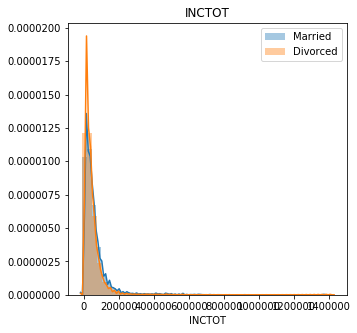

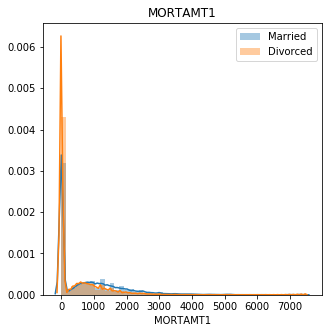

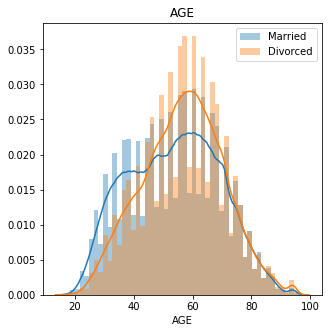

In [59]:
# Plot distribution of numerical variables
numerical_vars = ['UHRSWORK', 'AGEMARR', 'PCT_HHINC', 'PCT_MTG_INC',
                  'HHINCOME', 'INCTOT', 'MORTAMT1', 'AGE']

for column in numerical_vars:
    plt.figure(figsize = (5,5))
    sns.distplot(married_df[column], label = 'Married')
    sns.distplot(divorced_df[column], label = 'Divorced')
    plt.legend()
    plt.title(column)
    plt.show()

In [39]:
married_df = df.loc[df['MARST'] == 1]
divorced_df = df.loc[df['MARST'] == 4]

(<Figure size 1296x1296 with 20 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22a16048>,
       dtype=object))

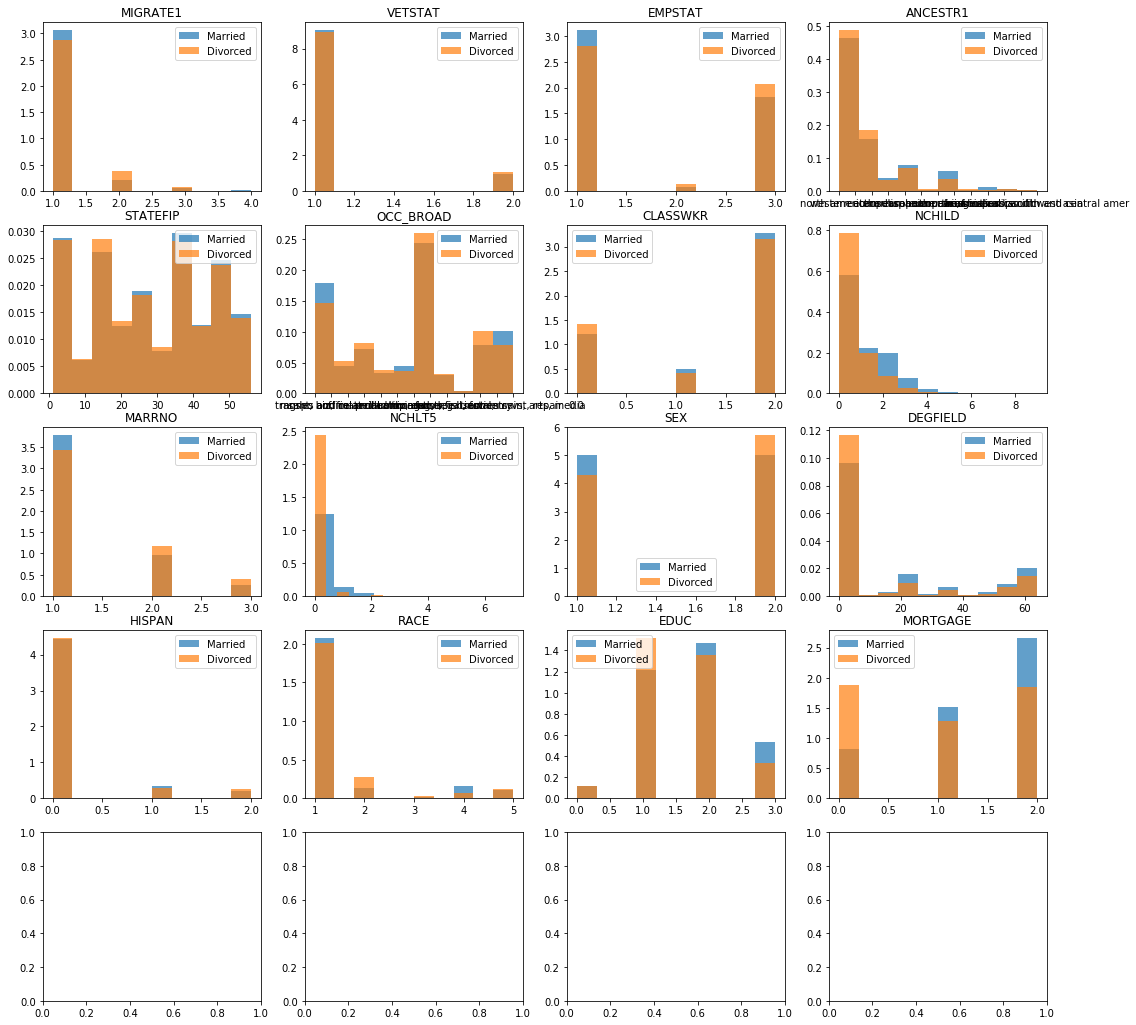

In [60]:
cat_vars = ['MIGRATE1', 'VETSTAT', 'EMPSTAT', 'ANCESTR1', 'STATEFIP', 'OCC_BROAD', 'CLASSWKR', 
            'NCHILD', 'MARRNO', 'NCHLT5', 'SEX', 'DEGFIELD', 'HISPAN', 'RACE', 'EDUC', 'MORTGAGE']

def hist_plot_1():    
    index_cols = cat_vars
    fig, ax = plt.subplots(5, 4, figsize=(18, 18))    
    for i, var in enumerate(index_cols):         
        try:
            row = i//4        
            col = i%4        
            ax[row][col].hist(married_df[var], density=True, alpha=0.7, label = "Married")        
            ax[row][col].hist(divorced_df[var], density=True, alpha = 0.7, label = 'Divorced')        
            ax[row][col].title.set_text(var)
            ax[row][col].legend()
        except:
            continue
    return fig, ax

hist_plot_1()